In [1]:
import pandas as pd 
import numpy as np

In [2]:


# Load all the datasets
telemetry = pd.read_csv('C:/Users/user/Downloads/PdM_telemetry.csv')
errors = pd.read_csv('C:/Users/user/Downloads/PdM_errors.csv')
failures = pd.read_csv('C:/Users/user/Downloads/PdM_failures.csv')
machines = pd.read_csv('C:/Users/user/Downloads/PdM_machines.csv')
maintenance = pd.read_csv('C:/Users/user/Downloads/PdM_maint.csv')

# Check their shapes
print(telemetry.shape)
print(errors.shape)
print(failures.shape)
print(machines.shape)
print(maintenance.shape)




(876100, 6)
(3919, 3)
(761, 3)
(100, 3)
(3286, 3)


In [3]:
# Check the structure and missing values

datasets = {
    "Telemetry": telemetry,
    "Errors": errors,
    "Failures": failures,
    "Machines": machines,
    "Maintenance": maintenance
}

# Loop through each dataset to print info and missing values
for name, df in datasets.items():
    print(f"\n{name} Dataset Info:\n{'-'*25}")
    print(df.info())
    print(f"\n{name} Missing Values:\n{'-'*25}")
    print(df.isnull().sum())




Telemetry Dataset Info:
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876100 entries, 0 to 876099
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876100 non-null  object 
 1   machineID  876100 non-null  int64  
 2   volt       876100 non-null  float64
 3   rotate     876100 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 40.1+ MB
None

Telemetry Missing Values:
-------------------------
datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
dtype: int64

Errors Dataset Info:
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  

In [4]:
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'])


In [5]:
# Convert datetime columns to datetime dtype
errors['datetime'] = pd.to_datetime(errors['datetime'])
failures['datetime'] = pd.to_datetime(failures['datetime'])
maintenance['datetime'] = pd.to_datetime(maintenance['datetime'])


In [6]:
print(telemetry.duplicated().sum())
print(errors.duplicated().sum())
print(failures.duplicated().sum())
print(machines.duplicated().sum())
print(maintenance.duplicated().sum())


0
0
0
0
0


In [7]:
# 1. Merge telemetry with machines (machineID is the key)
full_df = telemetry.merge(machines, on='machineID', how='left')

# 2. Merge errors on datetime + machineID
full_df = full_df.merge(errors, on=['datetime', 'machineID'], how='left')

# 3. Merge maintenance on datetime + machineID
full_df = full_df.merge(maintenance, on=['datetime', 'machineID'], how='left')

# 4. Merge failures on datetime + machineID
full_df = full_df.merge(failures, on=['datetime', 'machineID'], how='left')

# 5. Inspect the result shape and head
print(f"Merged dataframe shape: {full_df.shape}")
full_df.head()


Merged dataframe shape: (877209, 11)


,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,NaN,NaN,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,NaN,NaN,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,NaN,NaN,NaN
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,NaN,NaN,NaN
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,NaN,NaN,NaN


In [8]:
print(full_df[['errorID', 'comp', 'failure']].isna().sum())


errorID    873285
comp       874241
failure    876087
dtype: int64


In [9]:
full_df['comp'] = full_df['comp'].fillna('none')
full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,NaN,none,NaN
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,NaN,none,NaN
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,NaN,none,NaN
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,NaN,none,NaN
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,NaN,none,NaN


In [10]:
full_df['errorID'] = full_df['errorID'].fillna(0)
full_df['failure'] = full_df['failure'].fillna(0)
full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,0


In [11]:
full_df.info()
full_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 877209 entries, 0 to 877208
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   datetime   877209 non-null  datetime64[ns]
 1   machineID  877209 non-null  int64         
 2   volt       877209 non-null  float64       
 3   rotate     877209 non-null  float64       
 4   pressure   877209 non-null  float64       
 5   vibration  877209 non-null  float64       
 6   model      877209 non-null  object        
 7   age        877209 non-null  int64         
 8   errorID    877209 non-null  object        
 9   comp       877209 non-null  object        
 10  failure    877209 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(4)
memory usage: 73.6+ MB


datetime     0
machineID    0
volt         0
rotate       0
pressure     0
vibration    0
model        0
age          0
errorID      0
comp         0
failure      0
dtype: int64

In [12]:
for c in ['comp1', 'comp2', 'comp3', 'comp4']:
    full_df[f'{c}_maint'] = (full_df['comp'] == c).astype(int)
full_df.head()


,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure,comp1_maint,comp2_maint,comp3_maint,comp4_maint
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,0,0,0,0,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,0,0,0,0,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,0,0,0,0,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,0,0,0,0,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,0,0,0,0,0


In [13]:
comp_dummies = pd.get_dummies(full_df['comp'], prefix='comp')
full_df = pd.concat([full_df, comp_dummies], axis=1)

full_df.head()


,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure,comp1_maint,comp2_maint,comp3_maint,comp4_maint,comp_comp1,comp_comp2,comp_comp3,comp_comp4,comp_none
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,0,0,0,0,0,False,False,False,False,True
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,0,0,0,0,0,False,False,False,False,True
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,0,0,0,0,0,False,False,False,False,True
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,0,0,0,0,0,False,False,False,False,True
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,0,0,0,0,0,False,False,False,False,True


In [14]:
comp_columns = ['comp_comp1', 'comp_comp2', 'comp_comp3', 'comp_comp4', 'comp_none']
full_df[comp_columns] = full_df[comp_columns].astype(int)
full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure,comp1_maint,comp2_maint,comp3_maint,comp4_maint,comp_comp1,comp_comp2,comp_comp3,comp_comp4,comp_none
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,0,0,0,0,0,0,0,0,0,1
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,0,0,0,0,0,0,0,0,0,1
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,0,0,0,0,0,0,0,0,0,1
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,0,0,0,0,0,0,0,0,0,1
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,0,0,0,0,0,0,0,0,0,1


In [15]:
full_df.drop(['comp1_maint', 'comp2_maint', 'comp3_maint', 'comp4_maint'], axis=1, inplace=True, errors='ignore')


In [16]:
full_df.head()


,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure,comp_comp1,comp_comp2,comp_comp3,comp_comp4,comp_none
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,0,0,0,0,0,1
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,0,0,0,0,0,1
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,0,0,0,0,0,1
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,0,0,0,0,0,1
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,0,0,0,0,0,1


In [17]:
print(full_df.columns)

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration',
       'model', 'age', 'errorID', 'comp', 'failure', 'comp_comp1',
       'comp_comp2', 'comp_comp3', 'comp_comp4', 'comp_none'],
      dtype='object')


In [18]:
full_df.isnull().sum()


datetime      0
machineID     0
volt          0
rotate        0
pressure      0
vibration     0
model         0
age           0
errorID       0
comp          0
failure       0
comp_comp1    0
comp_comp2    0
comp_comp3    0
comp_comp4    0
comp_none     0
dtype: int64

In [19]:
full_df.dtypes


datetime      datetime64[ns]
machineID              int64
volt                 float64
rotate               float64
pressure             float64
vibration            float64
model                 object
age                    int64
errorID               object
comp                  object
failure               object
comp_comp1             int32
comp_comp2             int32
comp_comp3             int32
comp_comp4             int32
comp_none              int32
dtype: object

In [20]:
full_df['year'] = full_df['datetime'].dt.year
full_df['month'] = full_df['datetime'].dt.month
full_df['day'] = full_df['datetime'].dt.day
full_df['hour'] = full_df['datetime'].dt.hour
full_df['is_weekend'] = full_df['datetime'].isin([5, 6]).astype(int)
full_df['shift'] = full_df['hour'].apply(lambda x: 'night' if x < 6 else 'day' if x < 18 else 'evening')

full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,...,comp_comp2,comp_comp3,comp_comp4,comp_none,year,month,day,hour,is_weekend,shift
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,...,0,0,0,1,2015,1,1,6,0,day
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,...,0,0,0,1,2015,1,1,7,0,day
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,...,0,0,0,1,2015,1,1,8,0,day
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,...,0,0,0,1,2015,1,1,9,0,day
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,...,0,0,0,1,2015,1,1,10,0,day


In [21]:
# One-hot encode 'shift' column and join back to full_df
shift_dummies = pd.get_dummies(full_df['shift'], prefix='shift')

# Concatenate with original dataframe
full_df = pd.concat([full_df, shift_dummies], axis=1)

# Optionally, drop the original 'shift' column if no longer needed
full_df = full_df.drop('shift', axis=1)
full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,...,comp_comp4,comp_none,year,month,day,hour,is_weekend,shift_day,shift_evening,shift_night
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,...,0,1,2015,1,1,6,0,True,False,False
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,...,0,1,2015,1,1,7,0,True,False,False
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,...,0,1,2015,1,1,8,0,True,False,False
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,...,0,1,2015,1,1,9,0,True,False,False
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,...,0,1,2015,1,1,10,0,True,False,False


In [22]:
# Convert boolean columns to int
for col in ['shift_day', 'shift_evening', 'shift_night']:
    full_df[col] = full_df[col].astype(int)
full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,...,comp_comp4,comp_none,year,month,day,hour,is_weekend,shift_day,shift_evening,shift_night
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,...,0,1,2015,1,1,6,0,1,0,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,...,0,1,2015,1,1,7,0,1,0,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,...,0,1,2015,1,1,8,0,1,0,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,...,0,1,2015,1,1,9,0,1,0,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,...,0,1,2015,1,1,10,0,1,0,0


In [23]:
# Create binary columns for each component
full_df['failure_comp1'] = (full_df['failure'] == 'comp1').astype(int)
full_df['failure_comp2'] = (full_df['failure'] == 'comp2').astype(int)
full_df['failure_comp3'] = (full_df['failure'] == 'comp3').astype(int)
full_df['failure_comp4'] = (full_df['failure'] == 'comp4').astype(int)
full_df['failure_none'] = (full_df['failure'] == '0').astype(int)  # updated here

full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,...,hour,is_weekend,shift_day,shift_evening,shift_night,failure_comp1,failure_comp2,failure_comp3,failure_comp4,failure_none
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,...,6,0,1,0,0,0,0,0,0,0
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,model3,18,0,none,...,7,0,1,0,0,0,0,0,0,0
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,model3,18,0,none,...,8,0,1,0,0,0,0,0,0,0
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,model3,18,0,none,...,9,0,1,0,0,0,0,0,0,0
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,model3,18,0,none,...,10,0,1,0,0,0,0,0,0,0


In [24]:
# Ensure datetime column is datetime type and sorted
full_df['datetime'] = pd.to_datetime(full_df['datetime'])
full_df = full_df.sort_values('datetime').reset_index(drop=True)

for i in range(1, 5):
    failure_col = f'failure_comp{i}'
    last_failure_col = f'last_failure_time_comp{i}'
    time_since_col = f'time_since_failure_comp{i}'
    
    failure_times = full_df.loc[full_df[failure_col] == 1, 'datetime']
    full_df[last_failure_col] = failure_times.reindex(full_df.index).ffill()
    full_df[time_since_col] = (full_df['datetime'] - full_df[last_failure_col]).dt.total_seconds() / 3600
    full_df[time_since_col] = full_df[time_since_col].fillna(0)

full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,...,failure_comp4,failure_none,last_failure_time_comp1,time_since_failure_comp1,last_failure_time_comp2,time_since_failure_comp2,last_failure_time_comp3,time_since_failure_comp3,last_failure_time_comp4,time_since_failure_comp4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0
1,2015-01-01 06:00:00,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0
2,2015-01-01 06:00:00,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0
3,2015-01-01 06:00:00,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0
4,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0


In [25]:
# Example: find first failure time for machineID 1 and component 1
first_failure_time = full_df.loc[(full_df['machineID'] == 1) & (full_df['failure_comp1'] == 1), 'datetime'].min()
print(first_failure_time)


2015-03-06 06:00:00


In [26]:
for comp_num in range(1, 5):
    failure_col = f'failure_comp{comp_num}'

    full_df[f'failure_time_comp{comp_num}'] = np.where(
        full_df[failure_col] == 1, full_df['datetime'], pd.NaT
    )

    full_df[f'last_failure_time_comp{comp_num}'] = (
        full_df.groupby('machineID')[f'failure_time_comp{comp_num}'].ffill()
    )

    # **Ensure datetime type explicitly**
    full_df[f'last_failure_time_comp{comp_num}'] = pd.to_datetime(full_df[f'last_failure_time_comp{comp_num}'])

    full_df[f'time_since_failure_comp{comp_num}'] = (
        (full_df['datetime'] - full_df[f'last_failure_time_comp{comp_num}'])
        .dt.total_seconds()
        .div(3600)
    ).fillna(0)

    full_df[f'time_since_failure_comp{comp_num}'] = full_df[f'time_since_failure_comp{comp_num}'].clip(lower=0)

    full_df.drop(columns=[f'failure_time_comp{comp_num}'], inplace=True)


full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,...,failure_comp4,failure_none,last_failure_time_comp1,time_since_failure_comp1,last_failure_time_comp2,time_since_failure_comp2,last_failure_time_comp3,time_since_failure_comp3,last_failure_time_comp4,time_since_failure_comp4
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0
1,2015-01-01 06:00:00,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0
2,2015-01-01 06:00:00,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0
3,2015-01-01 06:00:00,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0
4,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,none,...,0,0,NaT,0.0,NaT,0.0,NaT,0.0,NaT,0.0


In [27]:
# Create binary columns for each error type
full_df['error_error1'] = (full_df['errorID'] == 'error1').astype(int)
full_df['error_error2'] = (full_df['errorID'] == 'error2').astype(int)
full_df['error_error3'] = (full_df['errorID'] == 'error3').astype(int)
full_df['error_error4'] = (full_df['errorID'] == 'error4').astype(int)
full_df['error_error5'] = (full_df['errorID'] == 'error5').astype(int)
full_df['error_none']   = (full_df['errorID'] == '0').astype(int)  # no error

full_df.head()

,datetime,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,...,last_failure_time_comp3,time_since_failure_comp3,last_failure_time_comp4,time_since_failure_comp4,error_error1,error_error2,error_error3,error_error4,error_error5,error_none
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
1,2015-01-01 06:00:00,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,none,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
2,2015-01-01 06:00:00,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,none,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
3,2015-01-01 06:00:00,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,none,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
4,2015-01-01 06:00:00,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,none,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0


In [28]:
full_df.drop('datetime', axis=1, inplace=True)
full_df.head()


,machineID,volt,rotate,pressure,vibration,model,age,errorID,comp,failure,...,last_failure_time_comp3,time_since_failure_comp3,last_failure_time_comp4,time_since_failure_comp4,error_error1,error_error2,error_error3,error_error4,error_error5,error_none
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,none,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,none,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,none,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,none,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,none,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0


In [29]:
full_df.drop('comp', axis=1, inplace=True)
full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,errorID,failure,comp_comp1,...,last_failure_time_comp3,time_since_failure_comp3,last_failure_time_comp4,time_since_failure_comp4,error_error1,error_error2,error_error3,error_error4,error_error5,error_none
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0


In [30]:
failure_cols = ['failure_comp1', 'failure_comp2', 'failure_comp3', 'failure_comp4', 'failure_none']
print(full_df[failure_cols].sum(axis=1).value_counts())


0    876087
1      1122
Name: count, dtype: int64


In [31]:
error_cols = ['error_error1', 'error_error2', 'error_error3', 'error_error4', 'error_error5', 'error_none']
print(full_df[error_cols].sum(axis=1).value_counts())


0    873285
1      3924
Name: count, dtype: int64


In [32]:
# For error:
no_error_rows = full_df[full_df[error_cols].sum(axis=1) == 0]
print(no_error_rows['errorID'].value_counts())

# For failure:
no_failure_rows = full_df[full_df[failure_cols].sum(axis=1) == 0]
print(no_failure_rows['failure'].value_counts())


errorID
0    873285
Name: count, dtype: int64
failure
0    876087
Name: count, dtype: int64


In [33]:
full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,errorID,failure,comp_comp1,...,last_failure_time_comp3,time_since_failure_comp3,last_failure_time_comp4,time_since_failure_comp4,error_error1,error_error2,error_error3,error_error4,error_error5,error_none
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0


In [34]:
full_df.drop(['failure', 'errorID'], axis=1, inplace=True)


In [35]:
full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,last_failure_time_comp3,time_since_failure_comp3,last_failure_time_comp4,time_since_failure_comp4,error_error1,error_error2,error_error3,error_error4,error_error5,error_none
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,NaT,0.0,NaT,0.0,0,0,0,0,0,0


In [36]:
print(full_df.columns)

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'model', 'age',
       'comp_comp1', 'comp_comp2', 'comp_comp3', 'comp_comp4', 'comp_none',
       'year', 'month', 'day', 'hour', 'is_weekend', 'shift_day',
       'shift_evening', 'shift_night', 'failure_comp1', 'failure_comp2',
       'failure_comp3', 'failure_comp4', 'failure_none',
       'last_failure_time_comp1', 'time_since_failure_comp1',
       'last_failure_time_comp2', 'time_since_failure_comp2',
       'last_failure_time_comp3', 'time_since_failure_comp3',
       'last_failure_time_comp4', 'time_since_failure_comp4', 'error_error1',
       'error_error2', 'error_error3', 'error_error4', 'error_error5',
       'error_none'],
      dtype='object')


In [37]:
# Create rolling mean and std columns (window size = 3, with minimum 1 row to avoid NaN)
full_df['volt_roll_mean_3'] = full_df['volt'].rolling(window=3, min_periods=1).mean()
full_df['volt_roll_std_3'] = full_df['volt'].rolling(window=3, min_periods=1).std().fillna(0)

full_df['pressure_roll_mean_3'] = full_df['pressure'].rolling(window=3, min_periods=1).mean()
full_df['pressure_roll_std_3'] = full_df['pressure'].rolling(window=3, min_periods=1).std().fillna(0)

full_df['vibration_roll_mean_3'] = full_df['vibration'].rolling(window=3, min_periods=1).mean()
full_df['vibration_roll_std_3'] = full_df['vibration'].rolling(window=3, min_periods=1).std().fillna(0)

# Preview the updated DataFrame
full_df.head()


,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,error_error3,error_error4,error_error5,error_none,volt_roll_mean_3,volt_roll_std_3,pressure_roll_mean_3,pressure_roll_std_3,vibration_roll_mean_3,vibration_roll_std_3
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,0,0,0,0,176.217853,0.000000,113.077935,0.000000,45.087686,0.000000
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,0,0,0,0,161.631278,20.628533,107.952402,7.248599,37.536497,10.678993
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,0,0,0,0,160.709365,14.673716,102.223337,11.168602,38.582704,7.765571
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,0,0,0,0,166.692631,24.517149,92.554503,9.504881,35.438355,5.348185
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,0,0,0,0,173.876441,18.233787,95.252590,13.976016,39.424816,3.326203


In [38]:
# Differences and percentage changes
full_df['volt_diff'] = full_df['volt'].diff()
full_df['pressure_diff'] = full_df['pressure'].diff()
full_df['vibration_diff'] = full_df['vibration'].diff()

full_df['volt_pct_change'] = full_df['volt'].pct_change()
full_df['pressure_pct_change'] = full_df['pressure'].pct_change()
full_df['vibration_pct_change'] = full_df['vibration'].pct_change()

full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,pressure_roll_mean_3,pressure_roll_std_3,vibration_roll_mean_3,vibration_roll_std_3,volt_diff,pressure_diff,vibration_diff,volt_pct_change,pressure_pct_change,vibration_pct_change
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,113.077935,0.000000,45.087686,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,107.952402,7.248599,37.536497,10.678993,-29.173151,-10.251067,-15.102377,-0.165552,-0.090655,-0.334956
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,102.223337,11.168602,38.582704,7.765571,11.820838,-12.061663,10.689807,0.080389,-0.117301,0.356501
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,92.554503,9.504881,35.438355,5.348185,35.302111,-6.693772,-5.020476,0.222214,-0.073748,-0.123429
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,95.252590,13.976016,39.424816,3.326203,-25.571518,26.849697,6.290051,-0.131698,0.319368,0.176416


In [39]:

# List of columns to fill NaNs for — difference and pct_change columns
diff_pct_cols = ['volt_diff', 'pressure_diff', 'vibration_diff', 
                 'volt_pct_change', 'pressure_pct_change', 'vibration_pct_change']

# Fill NaN with 0 (you can choose another value if needed)
full_df[diff_pct_cols] = full_df[diff_pct_cols].fillna(0)

full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,pressure_roll_mean_3,pressure_roll_std_3,vibration_roll_mean_3,vibration_roll_std_3,volt_diff,pressure_diff,vibration_diff,volt_pct_change,pressure_pct_change,vibration_pct_change
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,113.077935,0.000000,45.087686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,107.952402,7.248599,37.536497,10.678993,-29.173151,-10.251067,-15.102377,-0.165552,-0.090655,-0.334956
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,102.223337,11.168602,38.582704,7.765571,11.820838,-12.061663,10.689807,0.080389,-0.117301,0.356501
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,92.554503,9.504881,35.438355,5.348185,35.302111,-6.693772,-5.020476,0.222214,-0.073748,-0.123429
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,95.252590,13.976016,39.424816,3.326203,-25.571518,26.849697,6.290051,-0.131698,0.319368,0.176416


In [40]:
# Interaction terms
full_df['volt_pressure_ratio'] = full_df['volt'] / (full_df['pressure'] + 1e-5)  # add small value to avoid zero division
full_df['volt_vibration_product'] = full_df['volt'] * full_df['vibration']

# Binning example (3 bins: low, medium, high)
full_df['volt_bin'] = pd.qcut(full_df['volt'], q=3, labels=['low', 'medium', 'high'])
full_df['pressure_bin'] = pd.qcut(full_df['pressure'], q=3, labels=['low', 'medium', 'high'])
full_df['vibration_bin'] = pd.qcut(full_df['vibration'], q=3, labels=['low', 'medium', 'high'])

full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,pressure_diff,vibration_diff,volt_pct_change,pressure_pct_change,vibration_pct_change,volt_pressure_ratio,volt_vibration_product,volt_bin,pressure_bin,vibration_bin
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.558375,7945.255183,medium,high,high
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,-10.251067,-15.102377,-0.165552,-0.090655,-0.334956,1.430022,4409.180821,low,medium,low
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,-12.061663,10.689807,0.080389,-0.117301,0.356501,1.750291,6461.874264,low,low,medium
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,-6.693772,-5.020476,0.222214,-0.073748,-0.123429,2.309555,6922.977751,high,low,low
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,26.849697,6.290051,-0.131698,0.319368,0.176416,1.519964,7071.712816,medium,high,medium


In [41]:
full_df = pd.get_dummies(full_df, columns=['volt_bin', 'pressure_bin', 'vibration_bin'])
full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,volt_vibration_product,volt_bin_low,volt_bin_medium,volt_bin_high,pressure_bin_low,pressure_bin_medium,pressure_bin_high,vibration_bin_low,vibration_bin_medium,vibration_bin_high
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,7945.255183,False,True,False,False,False,True,False,False,True
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,4409.180821,True,False,False,False,True,False,True,False,False
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,6461.874264,True,False,False,True,False,False,False,True,False
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,6922.977751,False,False,True,True,False,False,True,False,False
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,7071.712816,False,True,False,False,False,True,False,True,False


In [42]:
# Step 1: Identify columns with '_bin_' in the name
bin_columns = [col for col in full_df.columns if '_bin_' in col]

# Step 2: Remove duplicates while keeping order
bin_columns = list(dict.fromkeys(bin_columns))

# Step 3: Convert each column to integer type
for col in bin_columns:
    full_df[col] = full_df[col].astype(int)


In [43]:
full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,volt_vibration_product,volt_bin_low,volt_bin_medium,volt_bin_high,pressure_bin_low,pressure_bin_medium,pressure_bin_high,vibration_bin_low,vibration_bin_medium,vibration_bin_high
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,7945.255183,0,1,0,0,0,1,0,0,1
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,4409.180821,1,0,0,0,1,0,1,0,0
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,6461.874264,1,0,0,1,0,0,0,1,0
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,6922.977751,0,0,1,1,0,0,1,0,0
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,7071.712816,0,1,0,0,0,1,0,1,0


In [44]:
full_df.head()


,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,volt_vibration_product,volt_bin_low,volt_bin_medium,volt_bin_high,pressure_bin_low,pressure_bin_medium,pressure_bin_high,vibration_bin_low,vibration_bin_medium,vibration_bin_high
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,7945.255183,0,1,0,0,0,1,0,0,1
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,4409.180821,1,0,0,0,1,0,1,0,0
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,6461.874264,1,0,0,1,0,0,0,1,0
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,6922.977751,0,0,1,1,0,0,1,0,0
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,7071.712816,0,1,0,0,0,1,0,1,0


In [45]:
print(full_df.columns)

Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'model', 'age',
       'comp_comp1', 'comp_comp2', 'comp_comp3', 'comp_comp4', 'comp_none',
       'year', 'month', 'day', 'hour', 'is_weekend', 'shift_day',
       'shift_evening', 'shift_night', 'failure_comp1', 'failure_comp2',
       'failure_comp3', 'failure_comp4', 'failure_none',
       'last_failure_time_comp1', 'time_since_failure_comp1',
       'last_failure_time_comp2', 'time_since_failure_comp2',
       'last_failure_time_comp3', 'time_since_failure_comp3',
       'last_failure_time_comp4', 'time_since_failure_comp4', 'error_error1',
       'error_error2', 'error_error3', 'error_error4', 'error_error5',
       'error_none', 'volt_roll_mean_3', 'volt_roll_std_3',
       'pressure_roll_mean_3', 'pressure_roll_std_3', 'vibration_roll_mean_3',
       'vibration_roll_std_3', 'volt_diff', 'pressure_diff', 'vibration_diff',
       'volt_pct_change', 'pressure_pct_change', 'vibration_pct_change',
       'volt_pressure_r

In [46]:
# Select only numerical columns from the DataFrame
numerical_df = full_df.select_dtypes(include=['int64', 'float64'])

# Display column names
print(numerical_df.columns)


Index(['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'age',
       'time_since_failure_comp1', 'time_since_failure_comp2',
       'time_since_failure_comp3', 'time_since_failure_comp4',
       'volt_roll_mean_3', 'volt_roll_std_3', 'pressure_roll_mean_3',
       'pressure_roll_std_3', 'vibration_roll_mean_3', 'vibration_roll_std_3',
       'volt_diff', 'pressure_diff', 'vibration_diff', 'volt_pct_change',
       'pressure_pct_change', 'vibration_pct_change', 'volt_pressure_ratio',
       'volt_vibration_product'],
      dtype='object')


In [47]:
numerical_df.describe()


,machineID,volt,rotate,pressure,vibration,age,time_since_failure_comp1,time_since_failure_comp2,time_since_failure_comp3,time_since_failure_comp4,...,vibration_roll_mean_3,vibration_roll_std_3,volt_diff,pressure_diff,vibration_diff,volt_pct_change,pressure_pct_change,vibration_pct_change,volt_pressure_ratio,volt_vibration_product
count,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,...,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000,877209.000000
mean,50.498446,170.780942,446.570735,100.861433,40.386459,11.330280,1456.230328,1194.142082,366.772744,566.171129,...,40.386464,4.714595,-0.000006,-0.000039,-0.000008,0.008390,0.011973,0.018139,1.713491,6897.437963
std,28.866697,15.511268,52.698963,11.052195,5.371894,5.827535,1791.418749,1538.967818,803.104176,967.208433,...,3.107787,2.563401,21.923671,15.617884,7.591313,0.130964,0.157343,0.195186,0.244455,1115.339195
min,1.000000,97.333604,138.432075,51.237106,14.877054,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.927670,0.000000,-119.648315,-101.916002,-44.778988,-0.514949,-0.631431,-0.642290,0.817178,2342.106726
25%,25.000000,160.305918,412.265479,93.499116,36.777911,7.000000,0.000000,0.000000,0.000000,0.000000,...,38.281245,2.802417,-14.694956,-10.124731,-5.009367,-0.082706,-0.096173,-0.117407,1.545245,6126.701465
50%,50.000000,170.609301,447.537538,100.426820,40.238339,12.000000,761.000000,588.000000,0.000000,0.000000,...,40.322894,4.372147,0.000000,-0.008149,-0.004029,0.000000,-0.000082,-0.000101,1.697741,6838.630552
75%,75.000000,181.008303,482.157025,107.557338,43.786484,16.000000,2360.000000,1824.000000,267.000000,881.000000,...,42.412048,6.242942,14.675427,10.110003,5.005965,0.090019,0.106178,0.132950,1.864395,7597.875755
max,100.000000,255.124717,695.020984,185.951998,76.791072,20.000000,8739.000000,8739.000000,6480.000000,6839.000000,...,64.993748,24.425918,105.669459,98.386764,41.085355,0.935216,1.361483,1.954075,3.730604,14865.444286


<Axes: >

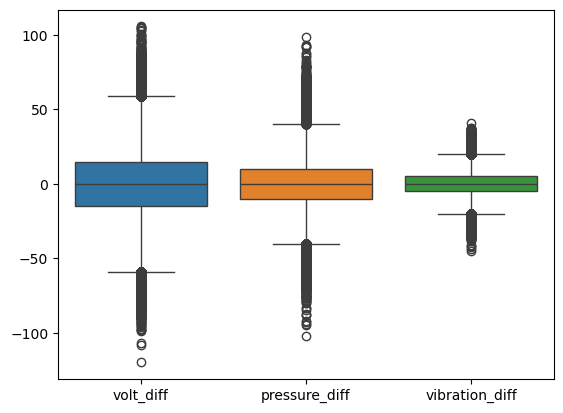

In [48]:
import seaborn as sns
sns.boxplot(data=numerical_df[['volt_diff', 'pressure_diff', 'vibration_diff']])


In [49]:
# Define lag steps
lags = [1, 3]
sensor_cols = ['volt', 'pressure', 'vibration']

for col in sensor_cols:
    for lag in lags:
        full_df[f'{col}_lag_{lag}'] = full_df[col].shift(lag)


In [50]:
# Define long rolling window
long_window = 12

for col in sensor_cols:
    full_df[f'{col}_roll_mean_{long_window}'] = full_df[col].rolling(window=long_window).mean()
    full_df[f'{col}_roll_std_{long_window}'] = full_df[col].rolling(window=long_window).std()


In [51]:
for col in sensor_cols:
    roll_mean = full_df[f'{col}_roll_mean_{long_window}']
    roll_std = full_df[f'{col}_roll_std_{long_window}']
    full_df[f'{col}_zscore_{long_window}'] = (full_df[col] - roll_mean) / roll_std


In [52]:
print(full_df.columns.tolist())


['machineID', 'volt', 'rotate', 'pressure', 'vibration', 'model', 'age', 'comp_comp1', 'comp_comp2', 'comp_comp3', 'comp_comp4', 'comp_none', 'year', 'month', 'day', 'hour', 'is_weekend', 'shift_day', 'shift_evening', 'shift_night', 'failure_comp1', 'failure_comp2', 'failure_comp3', 'failure_comp4', 'failure_none', 'last_failure_time_comp1', 'time_since_failure_comp1', 'last_failure_time_comp2', 'time_since_failure_comp2', 'last_failure_time_comp3', 'time_since_failure_comp3', 'last_failure_time_comp4', 'time_since_failure_comp4', 'error_error1', 'error_error2', 'error_error3', 'error_error4', 'error_error5', 'error_none', 'volt_roll_mean_3', 'volt_roll_std_3', 'pressure_roll_mean_3', 'pressure_roll_std_3', 'vibration_roll_mean_3', 'vibration_roll_std_3', 'volt_diff', 'pressure_diff', 'vibration_diff', 'volt_pct_change', 'pressure_pct_change', 'vibration_pct_change', 'volt_pressure_ratio', 'volt_vibration_product', 'volt_bin_low', 'volt_bin_medium', 'volt_bin_high', 'pressure_bin_low',

In [53]:
full_df.head()

,machineID,volt,rotate,pressure,vibration,model,age,comp_comp1,comp_comp2,comp_comp3,...,vibration_lag_3,volt_roll_mean_12,volt_roll_std_12,pressure_roll_mean_12,pressure_roll_std_12,vibration_roll_mean_12,vibration_roll_std_12,volt_zscore_12,pressure_zscore_12,vibration_zscore_12
0,1,176.217853,418.504078,113.077935,45.087686,model3,18,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,147.044702,409.767331,102.826869,29.985309,model3,17,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54,158.865540,463.154857,90.765206,40.675116,model2,10,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,79,194.167651,535.302327,84.071434,35.654640,model3,14,0,0,0,...,45.087686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99,168.596133,384.747105,110.921131,41.944692,model1,14,0,0,0,...,29.985309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
